In [15]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
questions = "GF_TutorialHelpful,GF_BasicMechanicTime,GF_SpecialSkillTime,GF_TutorialHelpRemember,GF_LearnedAllSkill,GF_InvolvedInGame,GF_NewBlockSame,GF_HintUseless"
questions = questions.split(',')

full_df = pd.read_csv('all_data.csv')

# Change age to year 20s, 30s,...
full_df['Ages'] = full_df['Age'].apply(lambda x: str(x)[0] + '0s')

print(len(set(full_df['User'])))

89


In [17]:
labels = ['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

# Add summed up column of the labels
full_df['Q_Sum'] = full_df[labels].sum(axis=1)


<Figure size 640x480 with 0 Axes>

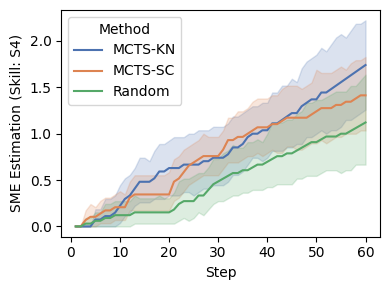

<Figure size 640x480 with 0 Axes>

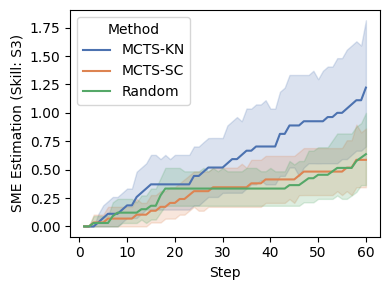

<Figure size 640x480 with 0 Axes>

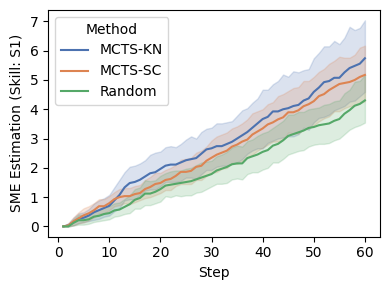

<Figure size 640x480 with 0 Axes>

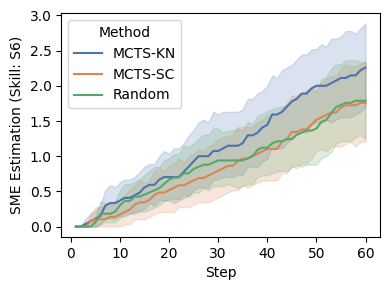

<Figure size 640x480 with 0 Axes>

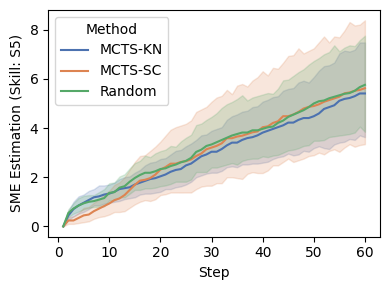

<Figure size 640x480 with 0 Axes>

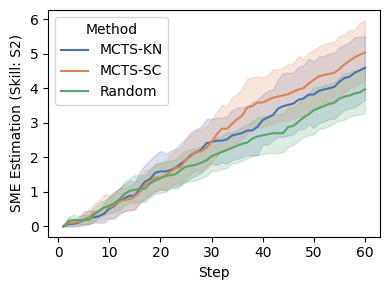

In [18]:
lp_df = full_df.copy()

labels = {
    'CM_BombPiece': 'S4',
    'CM_CrossPiece': 'S3',
    'CM_HorizontalPiece': 'S1',
    'CM_RainbowPiece': 'S6',
    'CM_RocketPiece': 'S5',
    'CM_VerticalPiece': 'S2'
}


lp_df['Method'] = lp_df['Method'].map({
    'MCTS_Knowledge': 'MCTS-KN',
    'MCTS_Score': 'MCTS-SC',
    'Random': 'Random',
})

for label, skill_num in labels.items():
    plt.clf()
    plt.figure(figsize=(4, 3))
    sns.set_palette('deep')
    sns.lineplot(data=lp_df, x="L_Step", y=label, hue="Method")
    # plt.ylim(0, 1.1)
    plt.xlabel('Step')
    plt.ylabel(f'SME Estimation (Skill: {skill_num})')
    plt.tight_layout()
    plt.savefig(f'CM_{skill_num}.pdf')
    plt.savefig(f'CM_{skill_num}.png', dpi=300)
    plt.show()


In [34]:
_dicts = list()

for idx, row in full_df.iterrows():

    for column in ['BombPiece', 'CrossPiece', 'HorizontalPiece', 'RainbowPiece', 'RocketPiece', 'VerticalPiece']:
        for match_event in ['MatchNoHint', 'MatchIgnoringHint']:

            if row[f'EVT_{match_event}_{column}'] == True:
                _dicts.append({
                    'User': row['User'],
                    'Method': row['Method'],
                    'L_Step': row['L_Step'],
                    'Skill': column,
                    'Event': match_event
                })

event_df = pd.DataFrame(_dicts)
event_df


,User,Method,L_Step,Skill,Event
0,14c0e24b,MCTS_Knowledge,4,HorizontalPiece,MatchNoHint
1,14c0e24b,MCTS_Knowledge,12,RocketPiece,MatchNoHint
2,14c0e24b,MCTS_Knowledge,30,VerticalPiece,MatchNoHint
3,14c0e24b,MCTS_Knowledge,36,BombPiece,MatchNoHint
4,1a1b31b1,MCTS_Knowledge,11,BombPiece,MatchNoHint
...,...,...,...,...,...
315,fda381bb,Random,14,VerticalPiece,MatchIgnoringHint
316,fda381bb,Random,33,BombPiece,MatchNoHint
317,fda381bb,Random,49,HorizontalPiece,MatchNoHint
318,fda381bb,Random,51,RainbowPiece,MatchNoHint


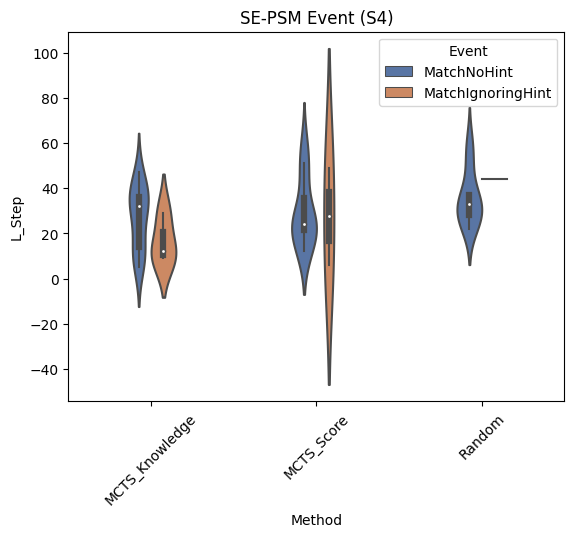

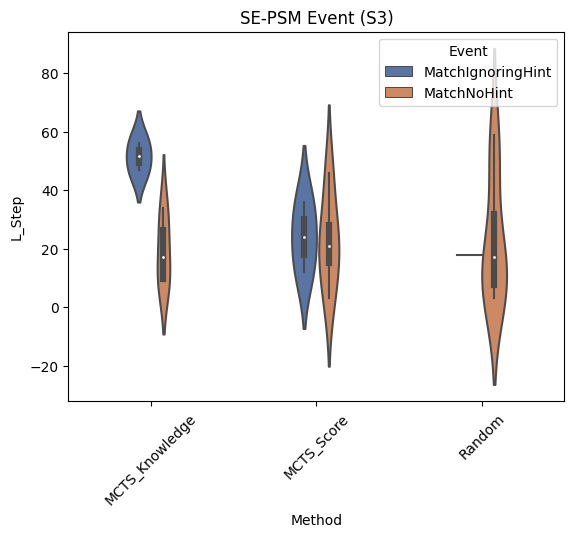

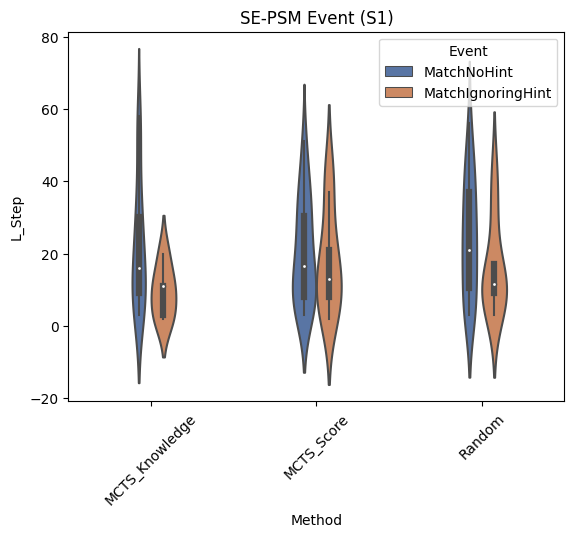

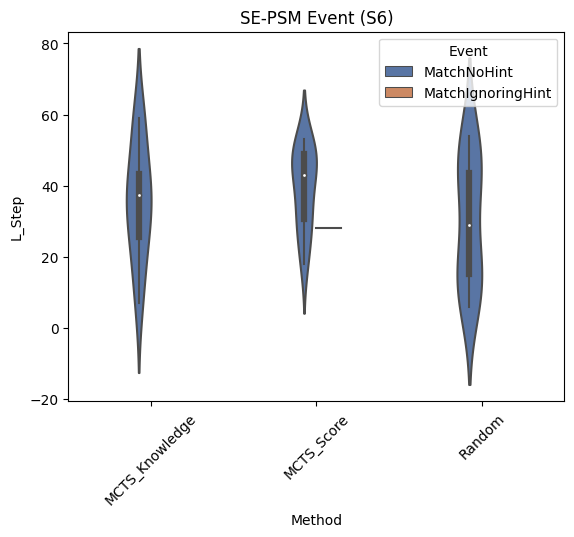

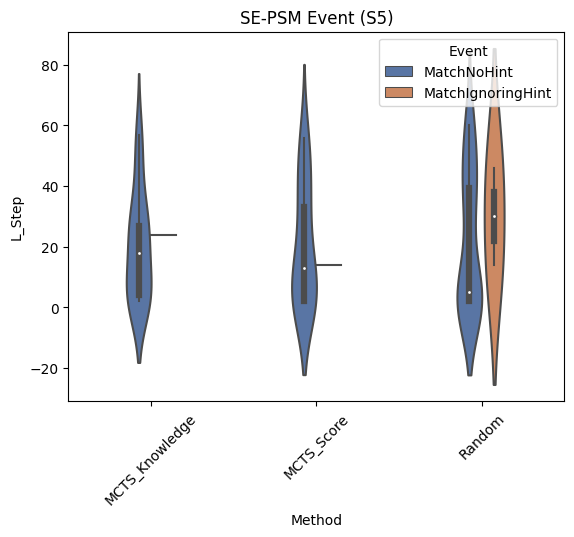

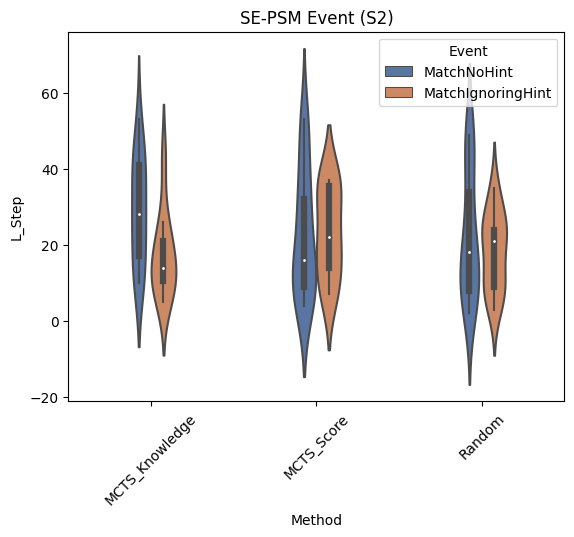

In [54]:
labels = {
    'BombPiece': 'S4',
    'CrossPiece': 'S3',
    'HorizontalPiece': 'S1',
    'RainbowPiece': 'S6',
    'RocketPiece': 'S5',
    'VerticalPiece': 'S2'
}

for column in ['BombPiece', 'CrossPiece', 'HorizontalPiece', 'RainbowPiece', 'RocketPiece', 'VerticalPiece']:
    ax = sns.violinplot(x="Method", y="L_Step", hue="Event", data=event_df[event_df['Skill'] == column], width=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'SE-PSM Event ({labels[column]})')
    plt.show()


In [62]:
event_df['Skill'] = event_df['Skill'].replace(labels)

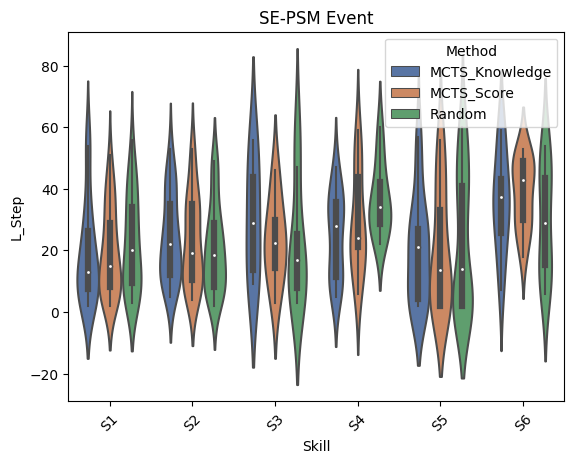

In [65]:
ax = sns.violinplot(x="Skill", y="L_Step", hue="Method", data=event_df, width=0.8, order=[f'S{i}' for i in range(1, 7)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title(f'SE-PSM Event')
plt.show()



In [76]:
tmp_df = full_df[(full_df['Method'] == 'Random') & (full_df['L_Step'] == 60)]
tmp_df = tmp_df[['CM_BombPiece', 'CM_CrossPiece', 'CM_HorizontalPiece', 'CM_RainbowPiece', 'CM_RocketPiece', 'CM_VerticalPiece']]
tmp_df.describe()


,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.121212,0.636364,4.303030,1.787879,5.757576,3.969697
std,1.408847,0.929320,2.417189,1.653738,5.717464,1.928161
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000,1.000000,2.000000,3.000000
50%,1.000000,0.000000,4.000000,1.000000,3.000000,4.000000
75%,2.000000,1.000000,5.000000,3.000000,7.000000,5.000000
max,6.000000,4.000000,11.000000,7.000000,24.000000,9.000000


In [79]:
tmp_df = full_df[(full_df['Method'] == 'MCTS_Score') & (full_df['L_Step'] == 60)]
tmp_df = tmp_df[['CM_BombPiece', 'CM_CrossPiece', 'CM_HorizontalPiece', 'CM_RainbowPiece', 'CM_RocketPiece', 'CM_VerticalPiece']]
tmp_df.describe()

,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.413793,0.586207,5.172414,1.758621,5.620690,5.034483
std,1.052794,0.732766,2.673534,1.595869,6.991902,2.456518
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,5.000000,2.000000,4.000000,5.000000
75%,2.000000,1.000000,7.000000,3.000000,8.000000,6.000000
max,5.000000,3.000000,11.000000,5.000000,28.000000,12.000000


In [80]:
tmp_df = full_df[(full_df['Method'] == 'MCTS_Knowledge') & (full_df['L_Step'] == 60)]
tmp_df = tmp_df[['CM_BombPiece', 'CM_CrossPiece', 'CM_HorizontalPiece', 'CM_RainbowPiece', 'CM_RocketPiece', 'CM_VerticalPiece']]
tmp_df.describe()

,CM_BombPiece,CM_CrossPiece,CM_HorizontalPiece,CM_RainbowPiece,CM_RocketPiece,CM_VerticalPiece
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.740741,1.222222,5.740741,2.259259,5.407407,4.592593
std,1.375405,1.527525,3.265114,1.654658,5.322371,2.605604
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.500000,1.000000,2.000000,3.000000
50%,2.000000,1.000000,5.000000,2.000000,4.000000,4.000000
75%,2.000000,2.000000,7.000000,3.000000,5.500000,6.000000
max,5.000000,6.000000,15.000000,7.000000,19.000000,10.000000
